<a href="https://colab.research.google.com/github/oviroger/proyecto1/blob/main/Prediccion_de_Precios_en_Bienes_Raices_Mercado_Australiano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Prediccion de Precios en Bienes Raices - Mercado Australiano 
## Regresion Avanzada

<img src="https://iexpats.wpenginepowered.com/wp-content/uploads/2016/12/house-prices.avif" alt="cover" width="800" align="center"/>

# Introduccion 

### Integrates de Grupo:
* José Estensoro (josee906@gmail.com)
* Roger Patón (oviroger@gmail.com)

## Entendimiento del Negocio

Una empresa de vivienda con sede en EE. UU. llamada Surprise Housing ha decidido ingresar al mercado australiano. La empresa utiliza el análisis de datos para comprar casas a un precio inferior a sus valores reales y venderlas a un precio más alto. Con el mismo propósito, la empresa ha recopilado un conjunto de datos de la venta de casas en Australia. Los datos se proporcionan en el archivo CSV a continuación.

La compañía está buscando posibles propiedades para comprar e ingresar al mercado. Debe construir un modelo de regresión utilizando la regularización para predecir el valor real de las posibles propiedades y decidir si invertir en ellas o no.

La empresa quiere saber:

* Qué variables son significativas para predecir el precio de una casa, y
* Qué tan bien esas variables describen el precio de una casa.

Además, determine el valor óptimo de lambda para la regresión de Ridge y Lasso.
 
### Objetivo del Negocio:

Debe modelar el precio de las casas con las variables independientes disponibles. Luego, la gerencia utilizará este modelo para comprender cómo varían exactamente los precios con las variables. En consecuencia, pueden manipular la estrategia de la empresa y concentrarse en áreas que generarán altos rendimientos. Además, el modelo será una buena manera para que la gerencia entienda la dinámica de precios de un nuevo mercado.

## Entendimiento de los Datos
## EDA

### Importación de bibliotecas y datos

In [ ]:
import os
import numpy as np 
import pandas as pd 
from scipy import stats

import matplotlib.pyplot as plt 
import seaborn as sns
palettes=['BuPu', 'Purples_r','YlGnBu_r', 'cool','coolwarm_r', 'gist_rainbow', 'gnuplot2', 'hsv_r']
sns.set_palette(palettes[1])

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('max_colwidth', None)

from google.colab import drive


In [ ]:
# Montamos el Google Drive:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Descripción de los datos
with open('/content/gdrive/MyDrive/12 Machine Learning/data/data_description.txt') as description:
     print(description.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [ ]:
# Lectura de los datos
data = pd.read_csv('/content/gdrive/MyDrive/12 Machine Learning/data/dataset.csv', index_col=[0])
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Exploración de los datos

#### 1. Los tipos de datos

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
print('*'*20)
print('Data | Data Types')
print('Object: ', data.dtypes[data.dtypes==object].count())
print('Numeric: ',data.dtypes[data.dtypes!=object].count())
print('*'*20)

********************
 Data | Data Types
Object:  43
Numeric:  37
********************


**Observación**
* Hay varios valores faltantes en algunas de las características.
* Con respecto a los tipos de características
     * 43 - categórico -ordinal, nominal, binario-
     * 36 - cuantitativo -descreto, continuo
* La mayoría de las características de entrada son categóricas.
* La función de salida es continua.
* Hay tres características categóricas clasificadas como numéricas, que deben ser cambiadas a objetos.
    * Mssubclass: clasificar la clase de construcción
    * Generalqual y GeneralCond: clasifica la calidad y el estado de la casa

In [ ]:
# Estas tres variables deben ser codificadas como datos categóricos.
data[['MSSubClass', 'OverallQual', 'OverallCond']] = data[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')

#### 2. Tratamiento de duplicados <a id="Duplicates"></a>

In [ ]:
# Datos duplicados
data.duplicated().sum()

0

#### 3. Valores faltantes

In [ ]:
# Porcentajes de datos faltantes ordenados de mayor a menor
print('Data Features | % datos faltantes')
print('*'*30)
print(round(data.isna().sum()[data.isna().sum()!=0] / data.shape[0] *100, 2).sort_values(ascending=False))
print('\n'*2)

Data Features | % datos faltantes
******************************
PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64





**Observación**
* La mayoría de los valores faltantes se deben a que la característica no está presente en la casa (según la descripción).
* Estos valores faltantes serán reemplazados por:
    * "NA" en variables categóricas
    * "0" en variables numéricas
* Las características con un porcentaje más bajo de valores faltantes serán reemplazados por la media o la moda.

In [ ]:
# Completar los valores faltantes de estas columnas con NA o 0 (no disponible) de acuerdo con la descripción de los datos

na_cat = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageCond','GarageQual','GarageFinish',
           'GarageType','BsmtCond','BsmtExposure','BsmtQual','BsmtFinType1','BsmtFinType2','MasVnrType'
         ]
data[na_cat] = data[na_cat].fillna('NA')

na_num = ['GarageYrBlt','BsmtFullBath','BsmtHalfBath','GarageArea','GarageCars','MasVnrArea','TotalBsmtSF','BsmtUnfSF',
           'BsmtFinSF2','BsmtFinSF1'
         ]
data[na_num] = data[na_num].fillna(0)

In [ ]:
# En la característica "Electrical", llenaremos los datos faltantes por el valor por defecto
data['Electrical'] = data['Electrical'].fillna("SBrkr") 

In [ ]:
# Reemplazaremos los valores faltantes de "LotFrontage" (Pies lineales de la calle conectado a la propiedad)
# por el valor medio de la variable "Neighborhood" (Ubicaciones físicas dentro de los límites de la ciudad de Ames).
data['LotFrontage'] = data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
# Nuevamente revisamos los datos faltantes 
print('Caract de ent | % datos faltantes')
print('*'*30)
print(round(data.isna().sum()[data.isna().sum()!=0] / data.shape[0] *100, 2).sort_values(ascending=False))
print('\n'*2)

Caract de ent | % datos faltantes
******************************
Series([], dtype: float64)





#### 4. Distribución de "SalePrice"

In [ ]:
data.SalePrice.describe().to_frame()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


In [ ]:
# Función para las gráficas mas importantes de "SalePrice"
def target_plot(precio):
    fig, ax = plt.subplots(1, 2,figsize=(18,6), dpi=100)

    sns.histplot(x=precio, data=data, kde=True, element="step", stat="density", ax=ax[0])

    sns.boxplot(x=precio, data=data,  ax=ax[1])
    ax[0].set_title(f"\n Kurtosis: {data[precio].kurt()}", fontsize=14, )

    plt.suptitle(precio, fontsize=18)
    fig.tight_layout()
    plt.show()

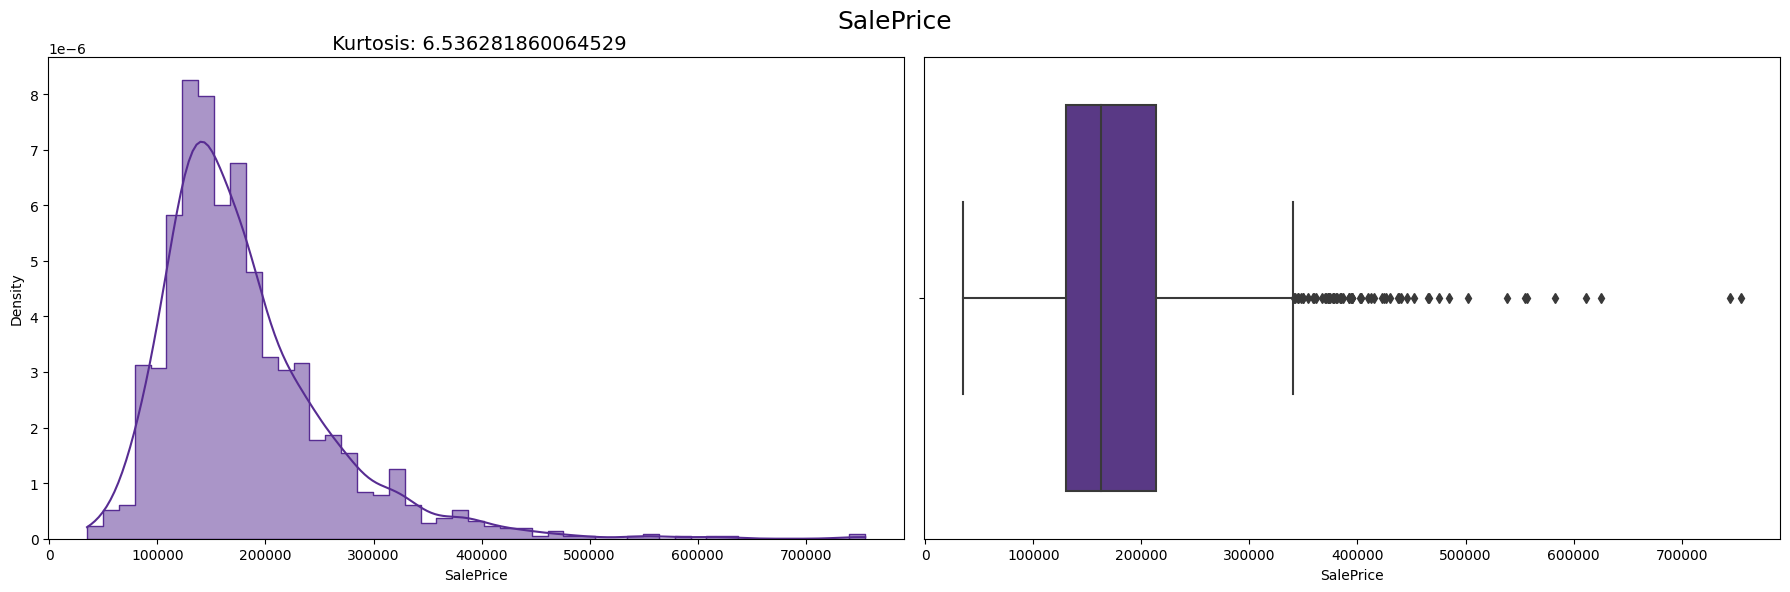

In [ ]:
target_plot('SalePrice')

** Kurtosis **: El valor de la kurtosis igual a 6.5 indica que la forma de la distribución es muy diferente a una distribución normal. Una distribución normal tiene un valor teórico de kurtosis de 3, por lo que un valor de 6.5 indica una curtosis significativamente mayor que la de una distribución normal.

** Observaciones **
* Nuestra variable objetivo es sesgada derecha.
* Hay múltiples valores atípicos en la variable.
* Crearemos una nueva característica (Log_saleprice) para mantener la variable de destino normalmente distribuida porque muchos modelos lineales y pruebas estadísticas lo suponen.
* Transformaremos el objetivo con la función log de Numpy.

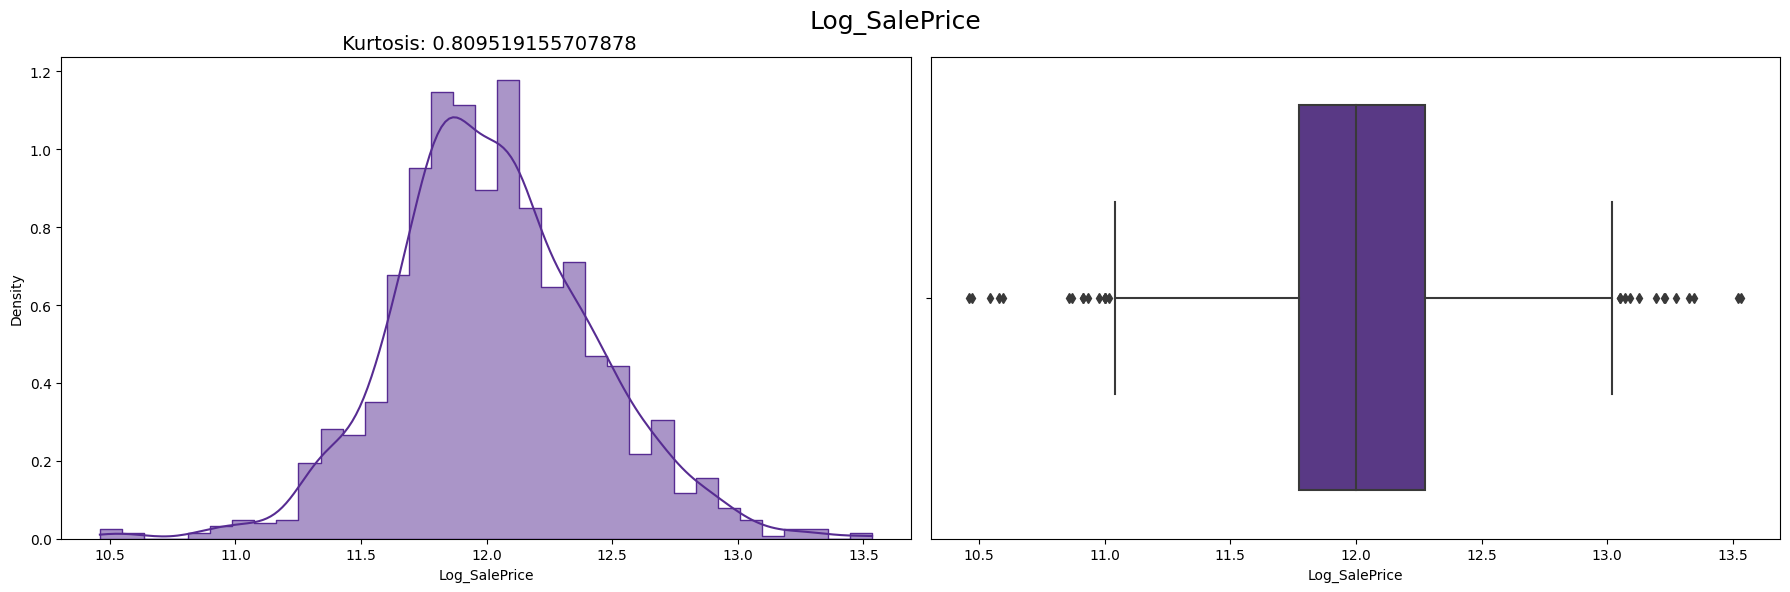

In [ ]:
#Graficamos nuevamente utilizando el logaritmo
data['Log_SalePrice'] = np.log1p(data.SalePrice)
target_plot('Log_SalePrice')

### Revisando las correlaciones con la variable objetivo

Las correlaciones pueden ayudar a identificar qué variables son más importantes para predecir la variable objetivo. Además, si dos variables están altamente correlacionadas, puede ser posible usar solo una de ellas en el modelo, lo que puede simplificar el modelo y reducir el sobreajuste. Nnos basaremos en el siguiente cuadro para analizar las variables:

<img src="https://machinelearningmastery.com/wp-content/uploads/2019/11/How-to-Choose-Feature-Selection-Methods-For-Machine-Learning.png" alt="drawing" width="600"/>

* Para medir la correlación entre el objetivo y las características numéricas, utilizaremos la correlación de Spearman.
* Utilizaremos la prueba ANOVA para medir la correlación entre el objetivo y las características categóricas.



#### Características numéricas

In [ ]:
# Pruebas de selección de features empleando "SelectKBest"
from sklearn.feature_selection import SelectKBest, chi2

# Selección solo de las características numéricas
numerical_features = data.select_dtypes(include=["Int64"]).columns
numerical_features = numerical_features.drop('SalePrice')

X = data[numerical_features]
y = data["SalePrice"]

# Perform the feature selection using chi-squared test
selector = SelectKBest(score_func=chi2, k=10)
X_new = selector.fit(X,y)

dfscores = pd.DataFrame(X_new.scores_)
dfcolumns = pd.DataFrame(X.columns)

#Concadenamos los dos dataframes para una mejor visualización 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #asignar nombres a las columnas de dataframe
print(featureScores.nlargest(10,'Score'))  #imprimir 10 mejores características

         Feature         Score
0        LotArea  1.011497e+07
27       MiscVal  6.253332e+06
8       2ndFlrSF  4.648841e+05
3     BsmtFinSF1  3.999851e+05
26      PoolArea  3.835642e+05
4     BsmtFinSF2  3.688827e+05
5      BsmtUnfSF  2.747512e+05
9   LowQualFinSF  2.448810e+05
10     GrLivArea  1.968501e+05
6    TotalBsmtSF  1.747065e+05


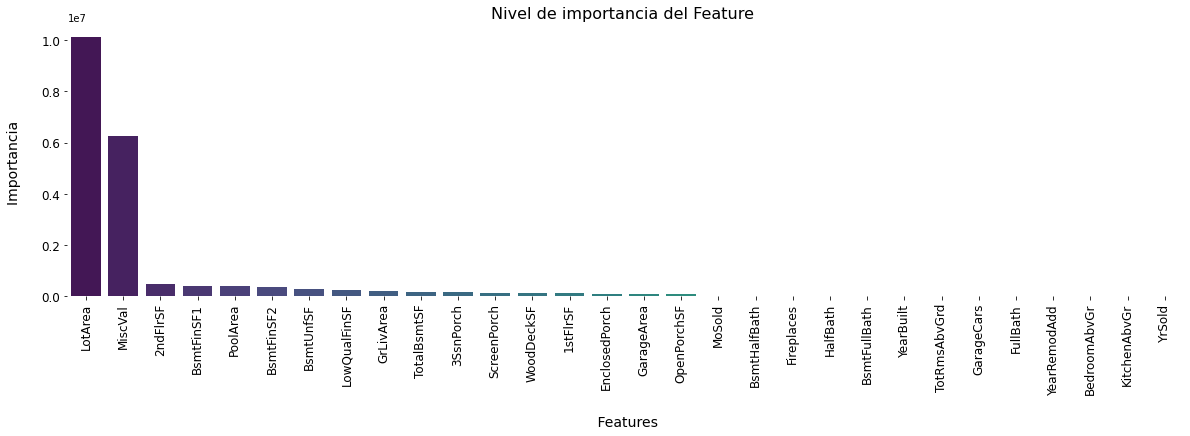

In [ ]:
# visualización de la selección de características
plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='Score', data=featureScores, palette = "viridis", order=featureScores.sort_values('Score',ascending = False).Feature)
plt.box(False)
plt.title('Nivel de importancia del Feature ', fontsize=16)
plt.xlabel('\n Features', fontsize=14)
plt.ylabel('Importancia \n', fontsize=14)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.show()

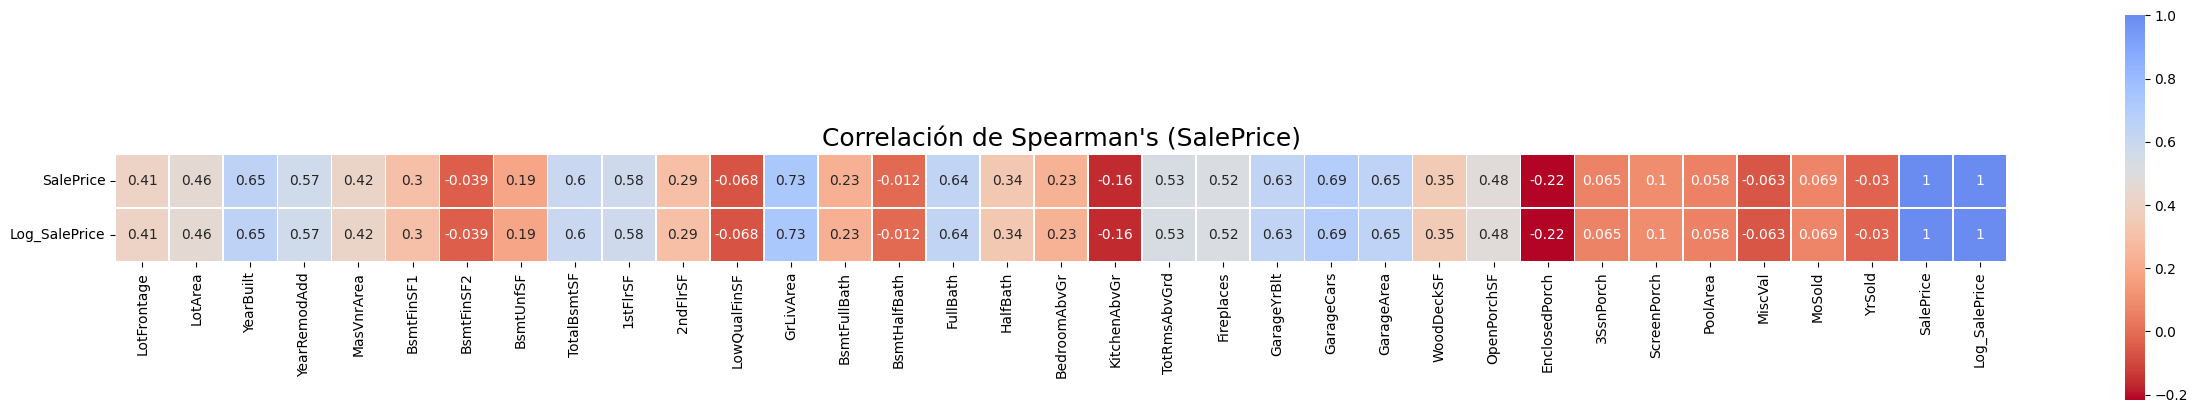

In [ ]:
# Correlación numérica
# Variables numéricas y su correlación de Spearman

mat_corr=data.corr(method='spearman')[['SalePrice', 'Log_SalePrice']]
plt.figure(figsize=(25,8), dpi=100)
sns.heatmap(mat_corr.T, annot=True, center=0.5, vmax=1, cmap=palettes[4],
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlación de Spearman's (SalePrice)", fontsize=18, y=3)
plt.tight_layout()
plt.show()

In [ ]:
# Variables numéricas con una relación fuerte con la variable precio (objetivo)
num_feat_sel = mat_corr[abs(mat_corr.SalePrice)>0.5].index.to_list()
print('Características numéricas seleccionadas: \n\n', num_feat_sel)

Características numéricas seleccionadas: 

 ['YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice', 'Log_SalePrice']


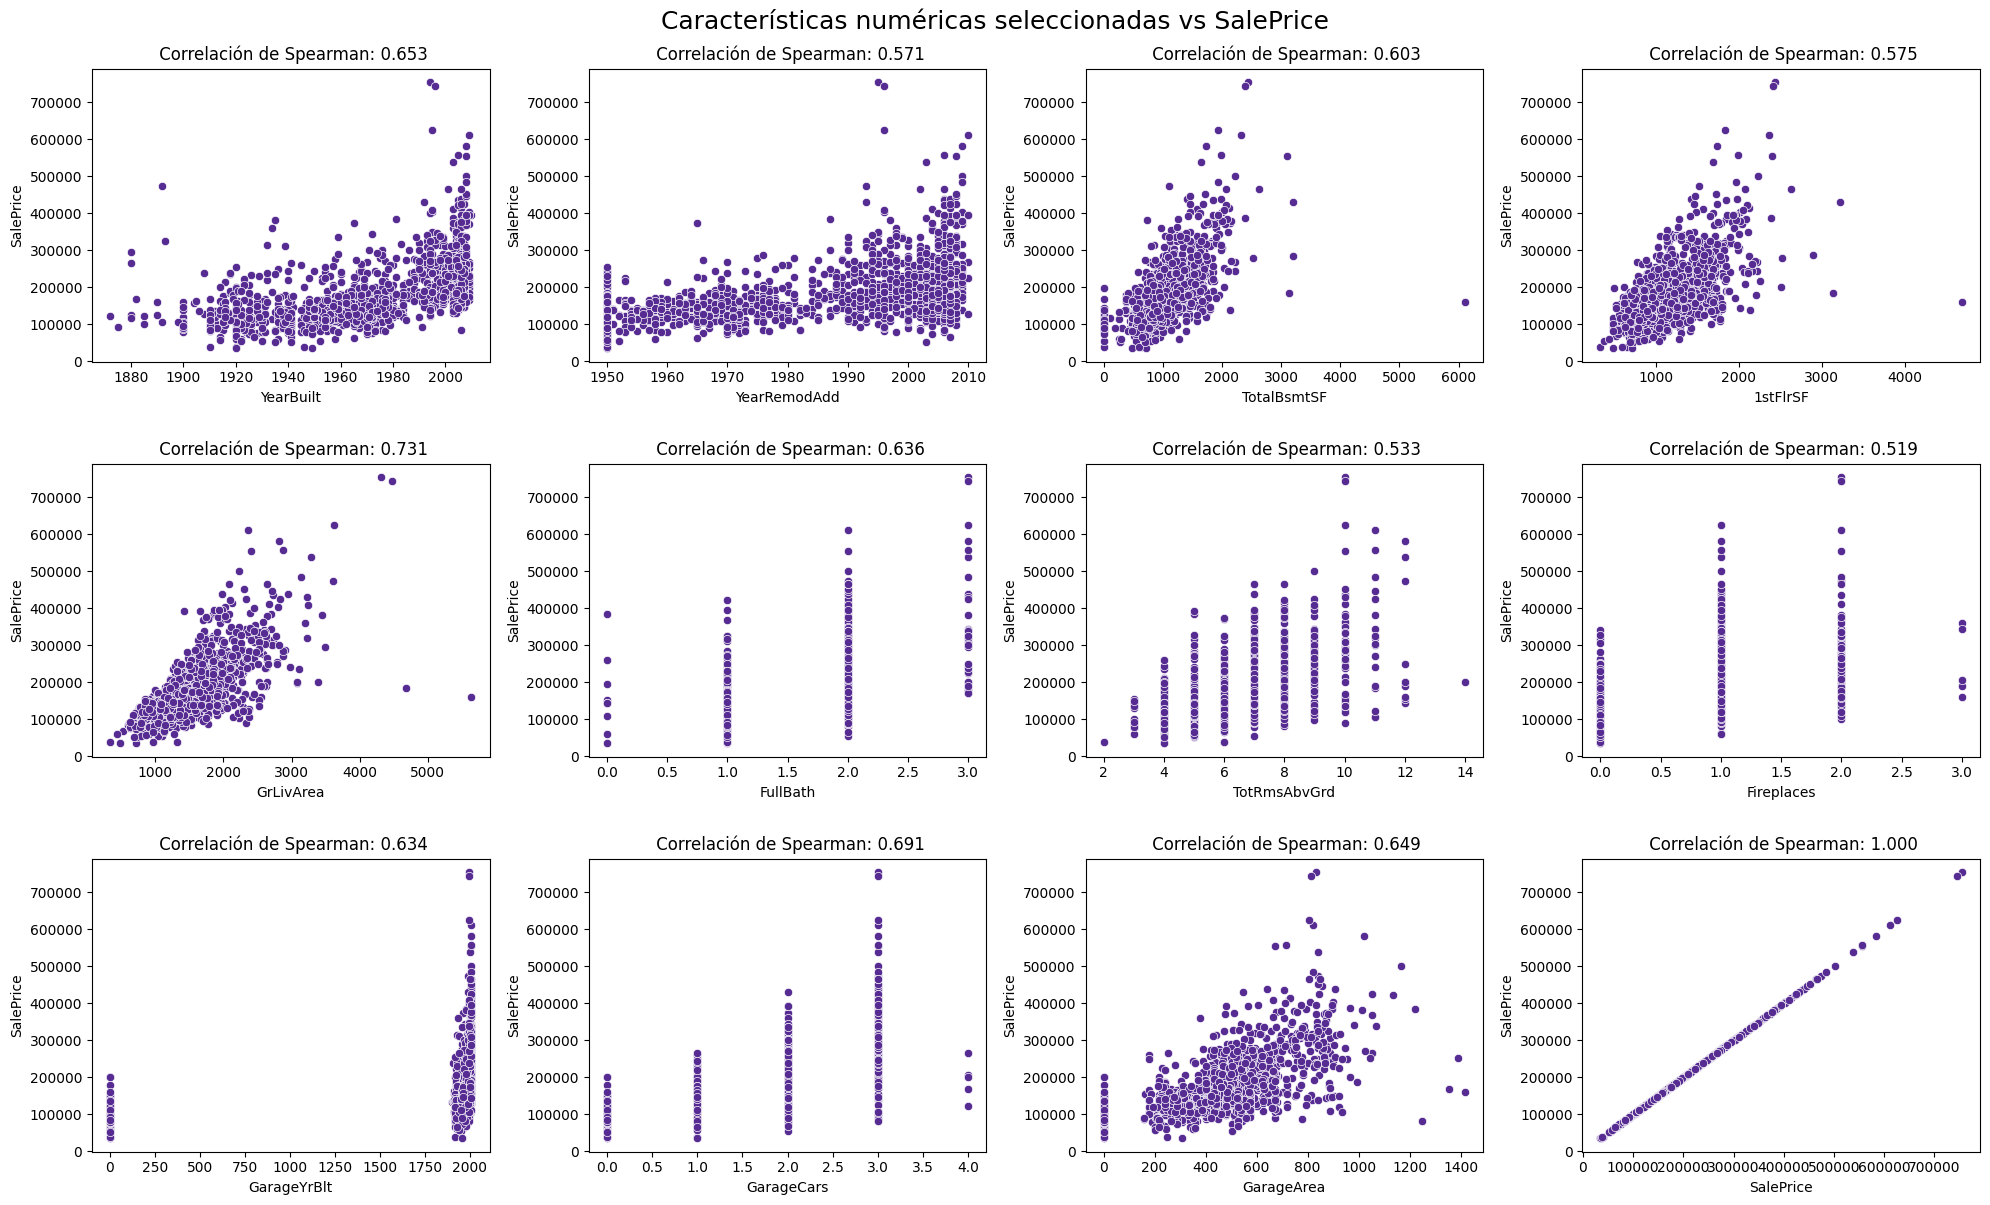

In [ ]:
ncols = 4
nrows = round(len(num_feat_sel)/ncols)
fig, ax = plt.subplots(nrows, ncols,figsize=(20,nrows*4), dpi=100)
for idx, col in enumerate(num_feat_sel[:-1]):
    chart = sns.scatterplot(x=col, y='SalePrice', data=data, ax=ax[idx//ncols, idx%ncols])
    chart.set_title(f"\n Correlación de Spearman: {mat_corr.SalePrice[col]:.3f}")

fig.suptitle('Características numéricas seleccionadas vs SalePrice\n', fontsize=18 , y=1)
fig.tight_layout()
plt.show()

In [ ]:
# Revisando algunos outliers
data[data.GrLivArea >= 4500]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Log_SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
524,60,RL,130.0,40094,Pave,NA,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NA,NA,NA,0,10,2007,New,Partial,184750,12.126764
1299,60,RL,313.0,63887,Pave,NA,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NA,NA,0,1,2008,New,Partial,160000,11.982935


In [ ]:
# Generando una copia del dataset original
data_orig = data.copy()

# Quitemos los outliers de GrLivArea > 4500
data = data[data.GrLivArea < 4500].copy()
data.reset_index(drop = True, inplace = True)

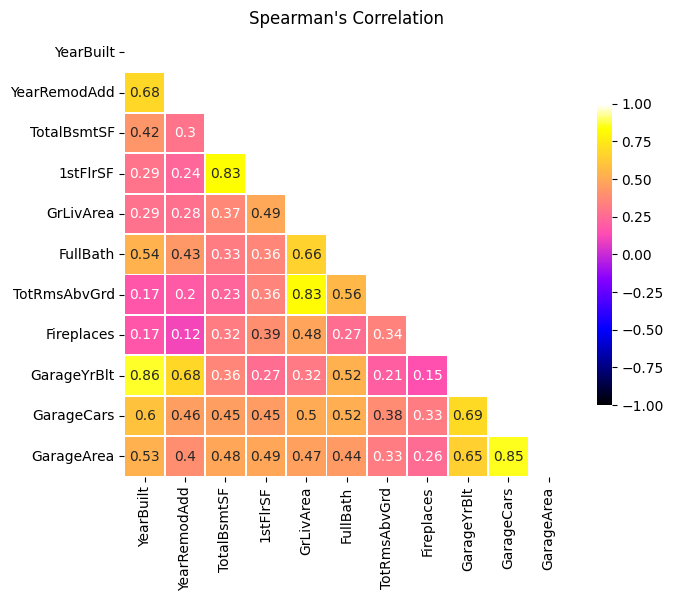

In [ ]:
# Correlación para las variables numéricas previamente seleccionadas

plt.figure(figsize=(7,7), dpi=100)
mat_corr=data[num_feat_sel[:-2]].corr(method='spearman')

sns.heatmap(mat_corr, annot=True, mask=np.triu(np.ones_like(mat_corr, dtype=bool)), center=0, vmax=1, vmin=-1, cmap=palettes[6],
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Spearman's Correlation", fontsize=12 )
plt.tight_layout()
plt.show()

** Observaciones **
* Estas variables tienen una fuerte correlación:
    * **GarageYrBlt** & Yearbuilt = 0.86 
    * TotRmsAbvGrd & GrLivArea = 0.83 
    * 1stFlrSF & TotalBsmtSF  = 0.83 
    * **GarageArea** & GarageCars = 0.85

#### Características categóricas

In [ ]:
# Utilizando el método de Kendall's
from scipy.stats import kendalltau

# Cree una lista para almacenar los valores tau de Kendall
kendall_values = []

# Calcule la tau de Kendall entre cada función y la variable de destino
for column in data.columns:
    if data[column].dtype == 'object': # calcular solo para características categóricas
        corr, _ = kendalltau(data[column], data['SalePrice'])
        kendall_values.append((column, corr))

# Ordene la lista de valores tau de Kendall en orden descendente
kendall_values.sort(key=lambda x: abs(x[1]), reverse=True)

# Seleccionamos las N características principales con los valores tau de Kendall más altos
N = 43 # sEspecificar el número de funciones a seleccionar.
selected_features = [kv[0] for kv in kendall_values[:N]]

# Usamos las funciones seleccionadas
df_selected = data[selected_features]

# Imprima las 30 características principales con los valores tau de Kendall más altos
for feature, corr in kendall_values[:43]:
    print("Feature: {}, Kendall's tau: {:.4f}".format(feature, corr))

Feature: OverallQual, Kendall's tau: 0.6713
Feature: ExterQual, Kendall's tau: -0.5230
Feature: KitchenQual, Kendall's tau: -0.4686
Feature: BsmtQual, Kendall's tau: -0.4599
Feature: GarageType, Kendall's tau: -0.4036
Feature: Foundation, Kendall's tau: 0.3964
Feature: GarageFinish, Kendall's tau: -0.3720
Feature: HeatingQC, Kendall's tau: -0.3650
Feature: GarageCond, Kendall's tau: 0.2790
Feature: MSZoning, Kendall's tau: -0.2694
Feature: SaleCondition, Kendall's tau: 0.2583
Feature: CentralAir, Kendall's tau: 0.2563
Feature: GarageQual, Kendall's tau: 0.2553
Feature: LotShape, Kendall's tau: -0.2456
Feature: Electrical, Kendall's tau: 0.2391
Feature: PavedDrive, Kendall's tau: 0.2286
Feature: HouseStyle, Kendall's tau: 0.1895
Feature: BsmtExposure, Kendall's tau: -0.1882
Feature: Condition1, Kendall's tau: 0.1487
Feature: Fence, Kendall's tau: 0.1468
Feature: SaleType, Kendall's tau: -0.1429
Feature: Neighborhood, Kendall's tau: 0.1183
Feature: RoofStyle, Kendall's tau: 0.1128
Featur

In [ ]:
# Correlación categórica mediante el análisis ANOVA
# La hipótesis nula en ANOVA es que todas las medias de los grupos son iguales, 
# es decir, que no hay diferencia significativa entre las medias de los grupos. 
# Si el valor de P es menor que un nivel de significación específico 
# (generalmente 0.05), significa que la hipótesis nula se puede rechazar, 
# y existe evidencia para apoyar la hipótesis alternativa de que al menos una 
# media de grupo es diferente de las demás.
anova_feat = data.columns[data.dtypes=='object'].to_list()

anovaStats = []

for var in anova_feat:
    catGrouplist = data.groupby(var).Log_SalePrice.apply(list)
    anovaStats.append([var, *stats.f_oneway(*catGrouplist)])
    
anova_df = pd.DataFrame(anovaStats, columns=['Feature', 'statistic', 'pvalue'])

In [ ]:
cat_feat_sel = anova_df[anova_df.pvalue<0.05].sort_values('pvalue').reset_index(drop=True)[:20].Feature
anova_df[anova_df.pvalue<0.05].sort_values('pvalue').reset_index(drop=True)[:20]

,Feature,statistic,pvalue
0,OverallQual,342.944588,0.000000e+00
1,Neighborhood,79.751025,1.634888e-243
2,ExterQual,422.324938,2.866856e-197
3,BsmtQual,303.646186,6.791010e-190
4,KitchenQual,397.495324,1.637677e-188
5,GarageFinish,299.148248,3.152865e-151
6,GarageType,121.830070,8.471072e-125
7,MSSubClass,50.959469,3.547688e-115
8,FireplaceQu,131.238108,6.914417e-115
9,Foundation,126.857929,1.309516e-111


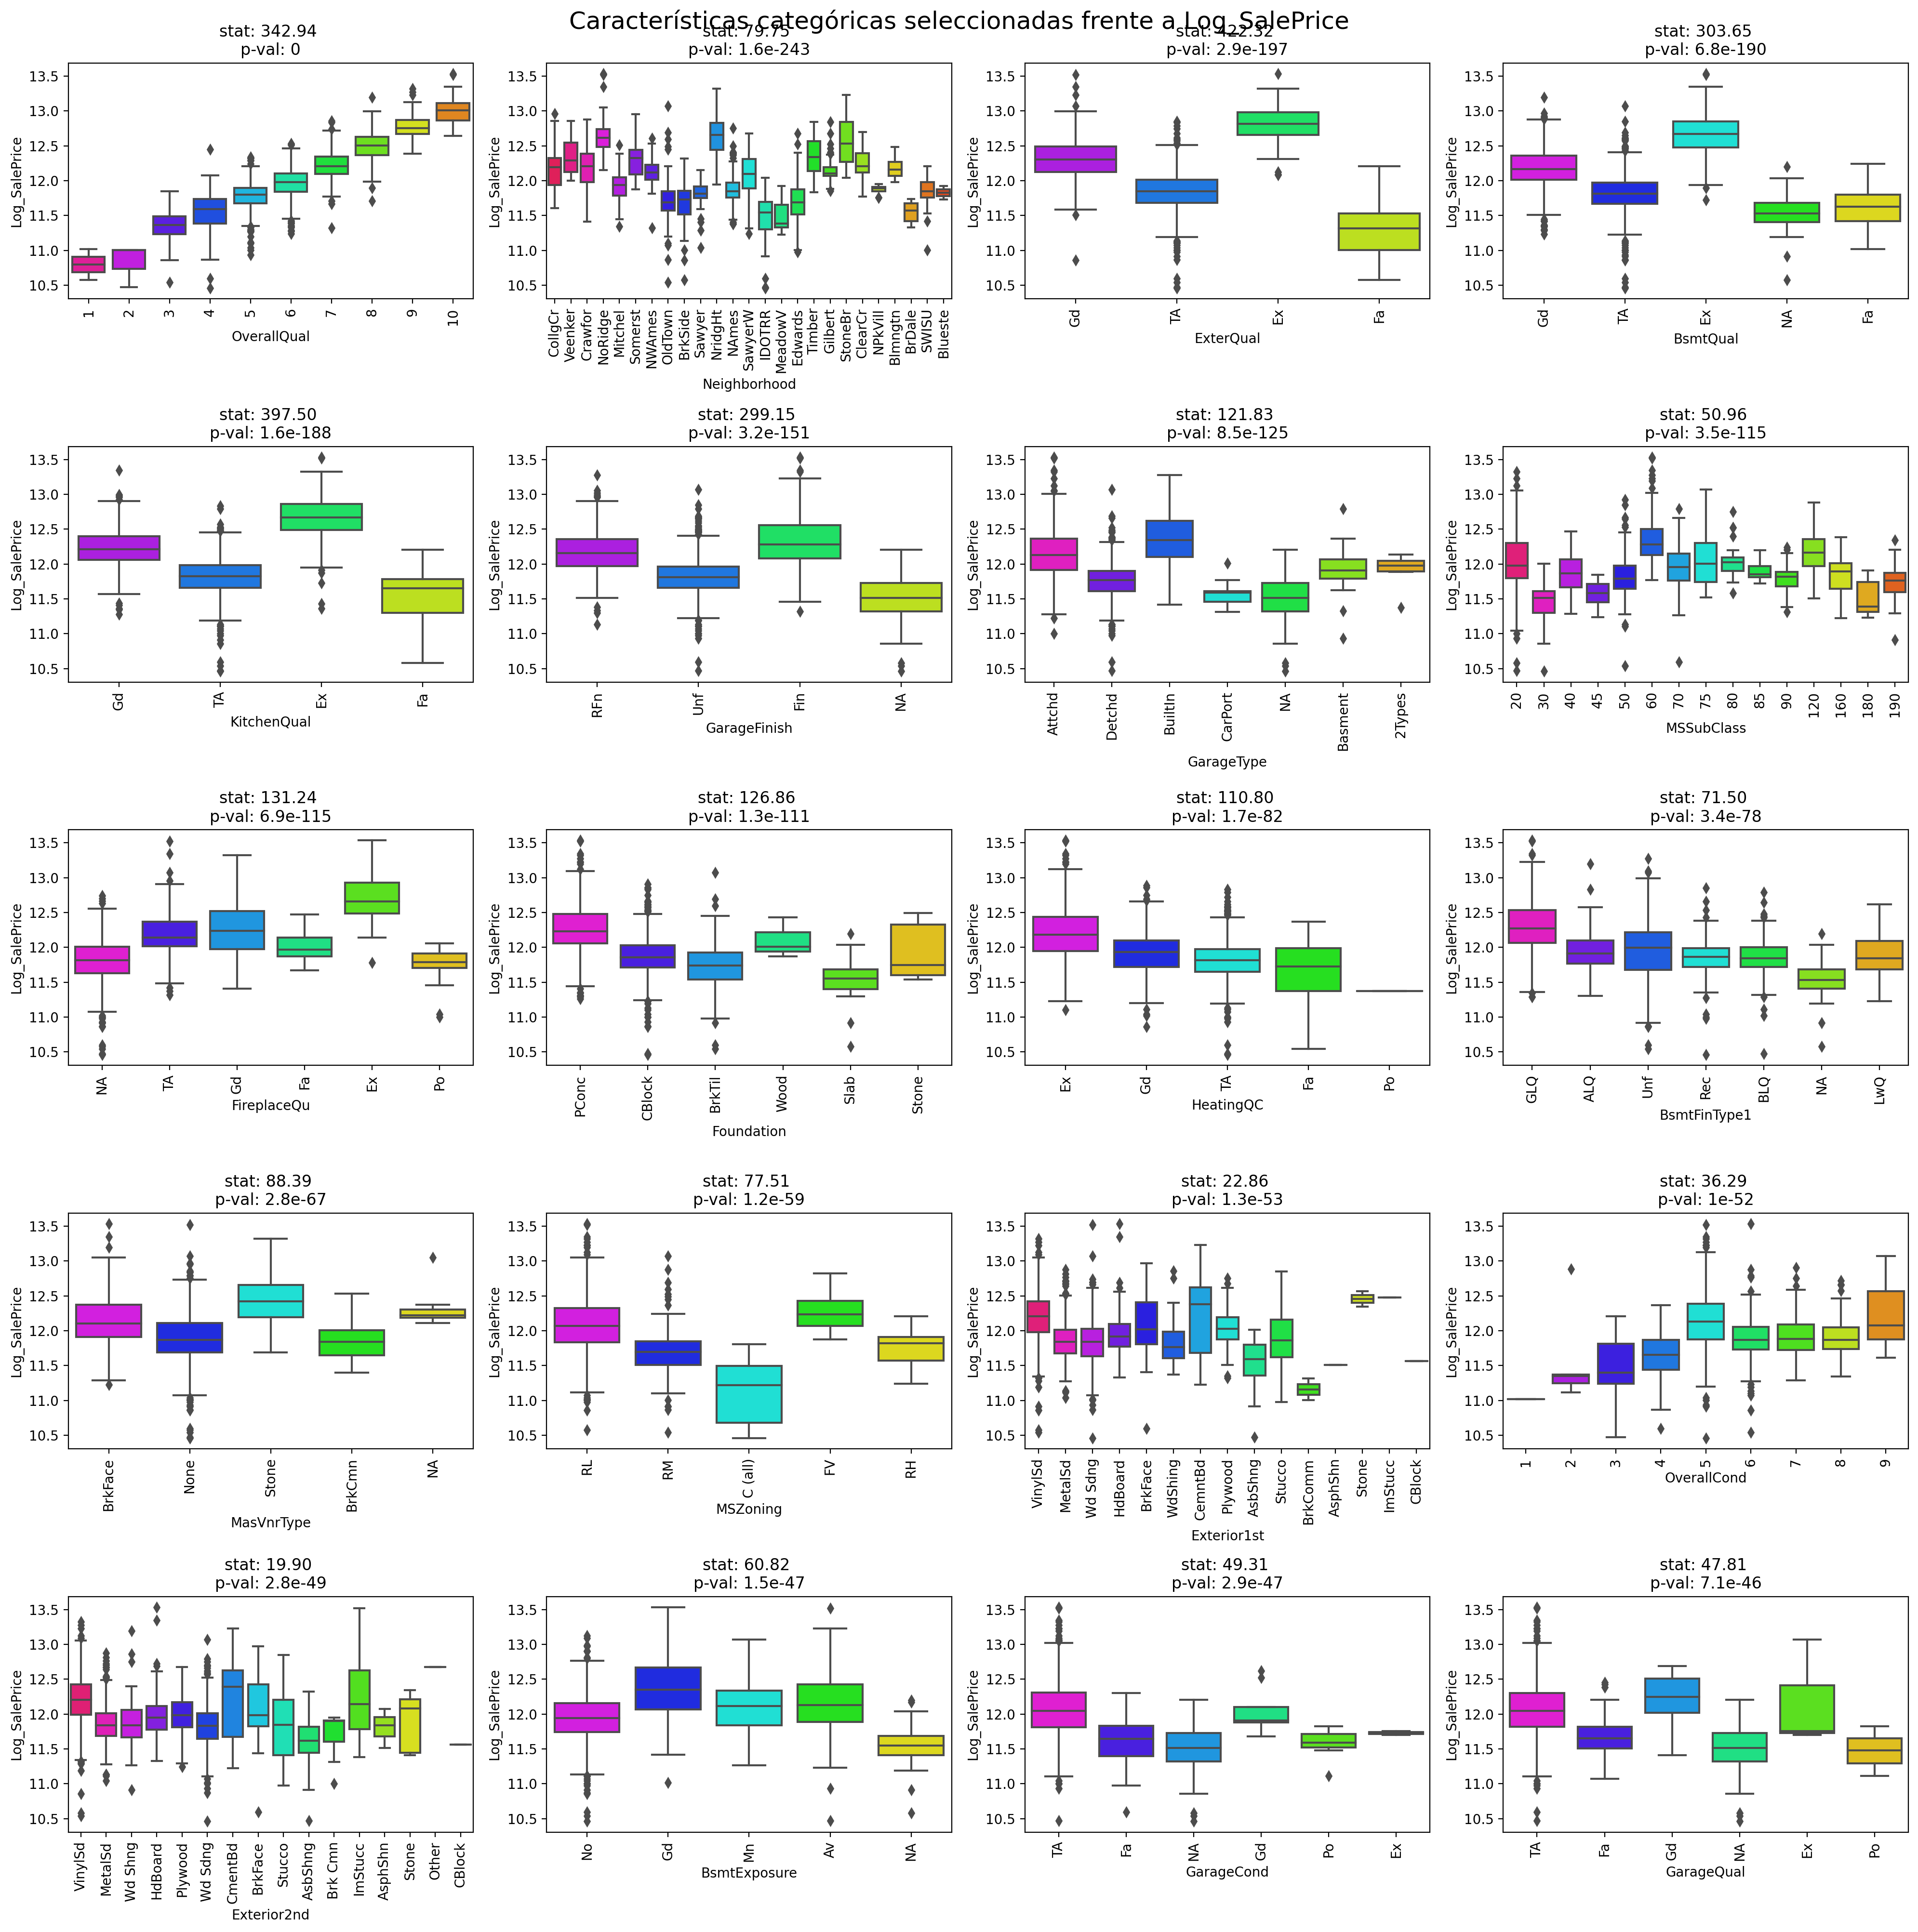

In [ ]:
#Graficamos los boxplots de cada variable vs SalePrice
ncols = 4 
nrows = round(len(cat_feat_sel)/ncols)

fig, ax = plt.subplots(nrows, ncols,figsize=(20,nrows*4), dpi=200)

for idx, col in enumerate(cat_feat_sel):
    chart=sns.boxplot(x=col, y='Log_SalePrice', data=data, ax=ax[idx//ncols, idx%ncols],  palette=palettes[7])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    arr = anova_df.loc[anova_df.Feature==col, ['statistic', 'pvalue']].values[0]
    chart.set_title(f"stat: {arr[0]:.2f} \np-val: {arr[1]:.2g}")

fig.suptitle('Características categóricas seleccionadas frente a Log_SalePrice', fontsize=18 , y=1)
plt.tight_layout()
plt.show()

In [ ]:
# Preparamos los datos para graficar la matriz de correlación
chi2matrix=pd.DataFrame(data[cat_feat_sel],columns=cat_feat_sel,index=cat_feat_sel)

for icol in cat_feat_sel: 
    for jcol in cat_feat_sel:
        crosstab=pd.crosstab(data[icol],data[jcol])
        stat,p,dof,expected = stats.chi2_contingency(crosstab)
        chi2matrix.loc[icol,jcol]= p
        cntexpected=expected[expected<5].size
        perexpected=((expected.size-cntexpected)/expected.size)*100
        if perexpected<20:
            chi2matrix.loc[icol,jcol]=1
        if icol==jcol:
             chi2matrix.loc[icol,jcol]=0.00        

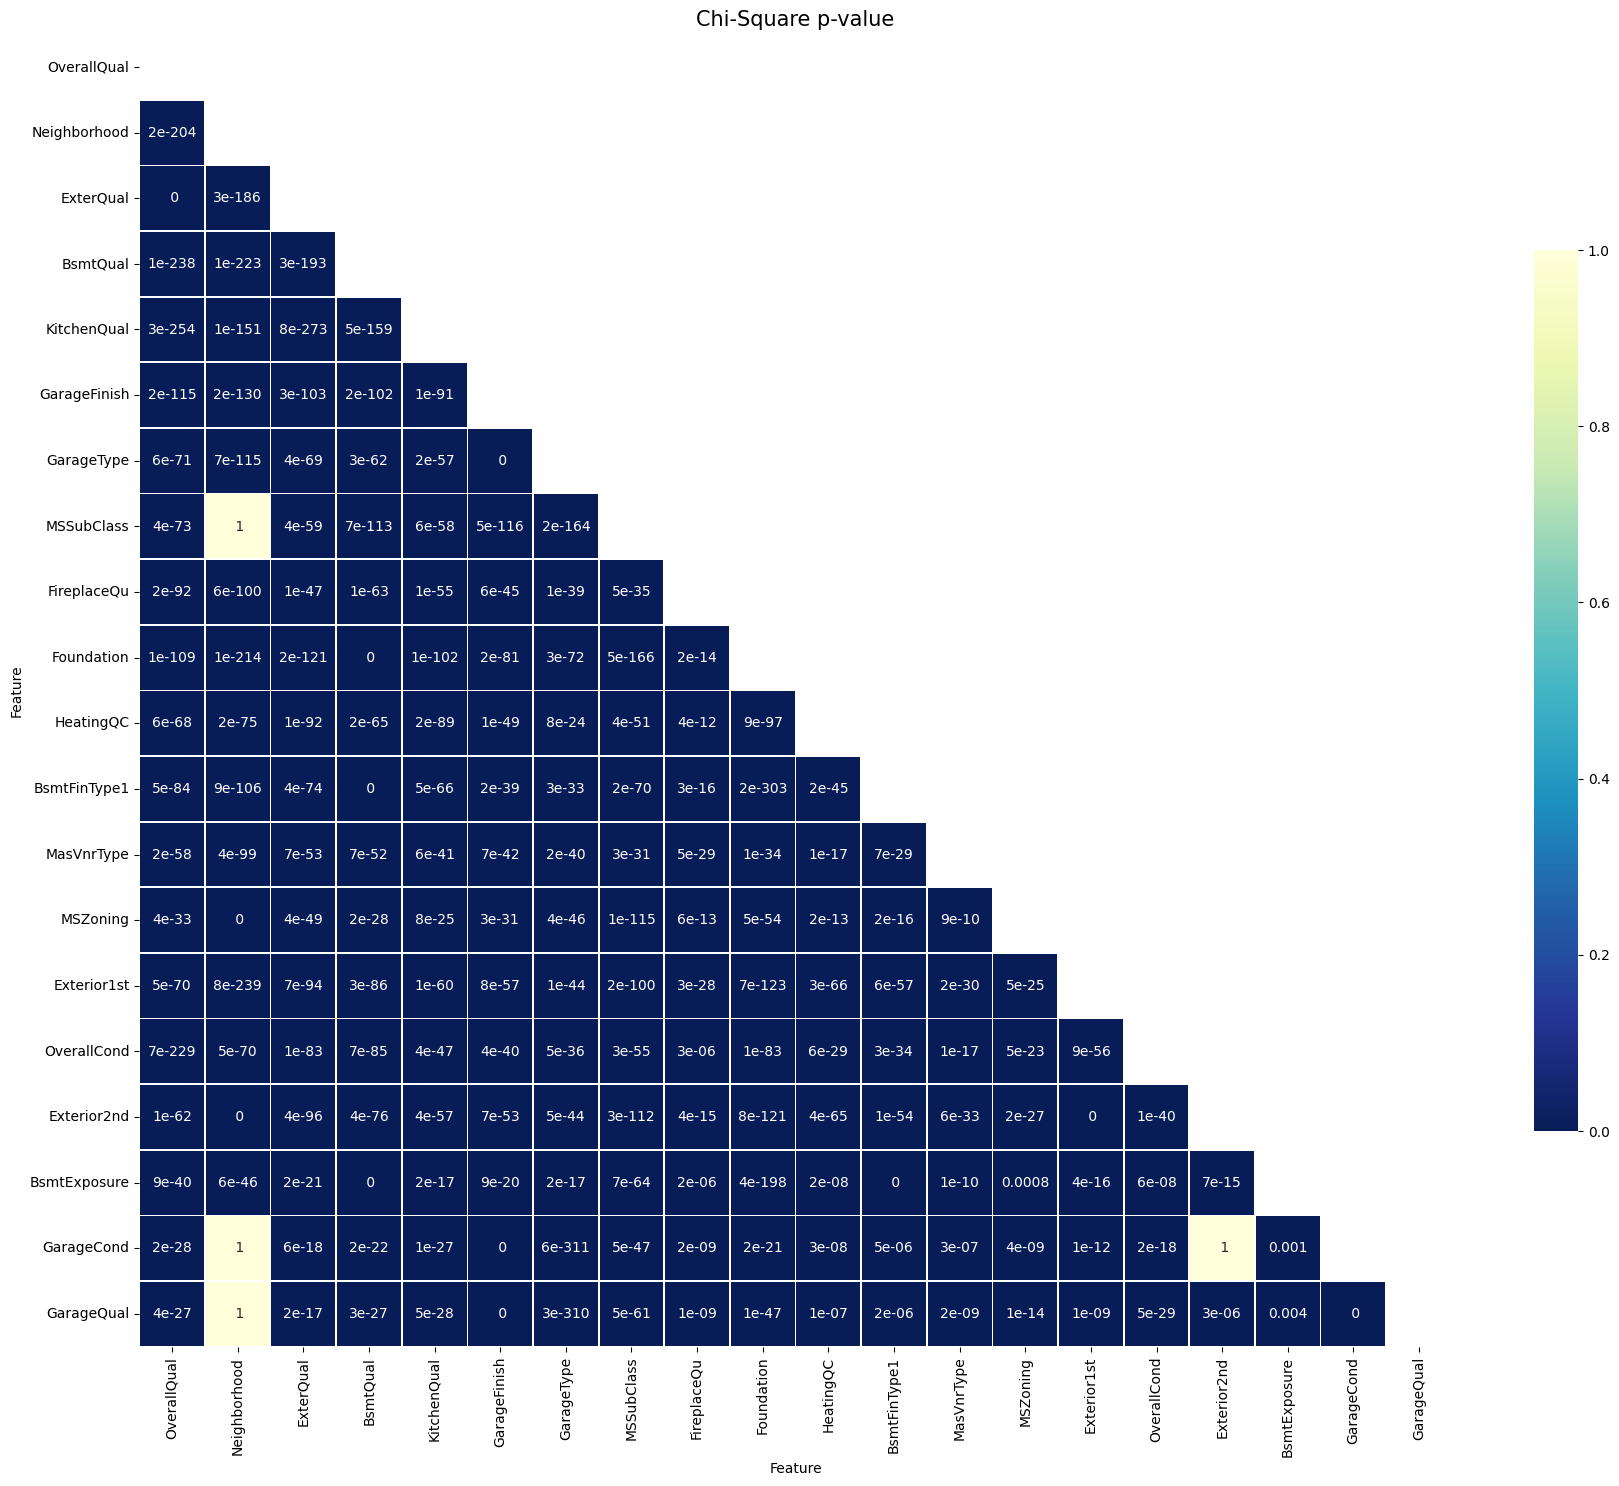

In [ ]:
# Graficamos la matriz de correlación
plt.figure(figsize=(18,18), dpi=100)
chi2matrix = chi2matrix.astype(float)
sns.heatmap(chi2matrix, 
            annot=True, fmt='2.0g', 
            mask=np.triu(np.ones_like(chi2matrix, dtype=bool)), 
            cmap=palettes[2], square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Chi-Square p-value", fontsize=15 )
plt.tight_layout()
plt.show()

**Observaciones**
- En base a los datos de la matriz de correlación se obtienen los siguentes resultados:
* Estas variables tienen una relación lineal fuerte:
    * SaleType & BsmtCond 
    * SaleType & LotShape
    * SaleType & HouseStyle
    * SaleType & Electrical
    * SaleType & OverallQual
    * SaleType & Neighborhood
    * SaleType & MSSubClass
    * SaleType & Foundation
    * SaleType & Exterior1st
    * SaleType & OverallCond
    * SaleType & Exterior2nd
    * SaleType & GarageCond
    * SaleType & GarageQual
    * SaleType & SaleCondition
    * Neighborhood & GarageQual
    * Neighborhood & GarageCond
    * Neighborhood & MSSubClass
* Estas variables no tienen una relación lineal:
    * OverallQual & ExterQual 
    * Neighborhood & MSZonnig
    * Neighborhood & Exterior2nd
    * BsmtQual & BsmtCond
    * BsmtQual & BsmtExposure
    * BsmtQual & BsmtFinType1
    * BsmtQual & Fundation
    * BsmtFinType1 & BsmtExposure
    * GarageFinish & GarageQual
    * GarageFinish & GarageCond
    * GarageFinish & GarageType
    * GarageCond & GarageQual
    * MSSubClass & HouseStyle
    * Exterior1st & Exterior2nd



### Selección y codificación de características

Según el algoritmo "SelectKBest", la correlación de Spearman, la prueba de  Kendall, de ANOVA y la prueba Chi-cuadrado, las características seleccionadas son:
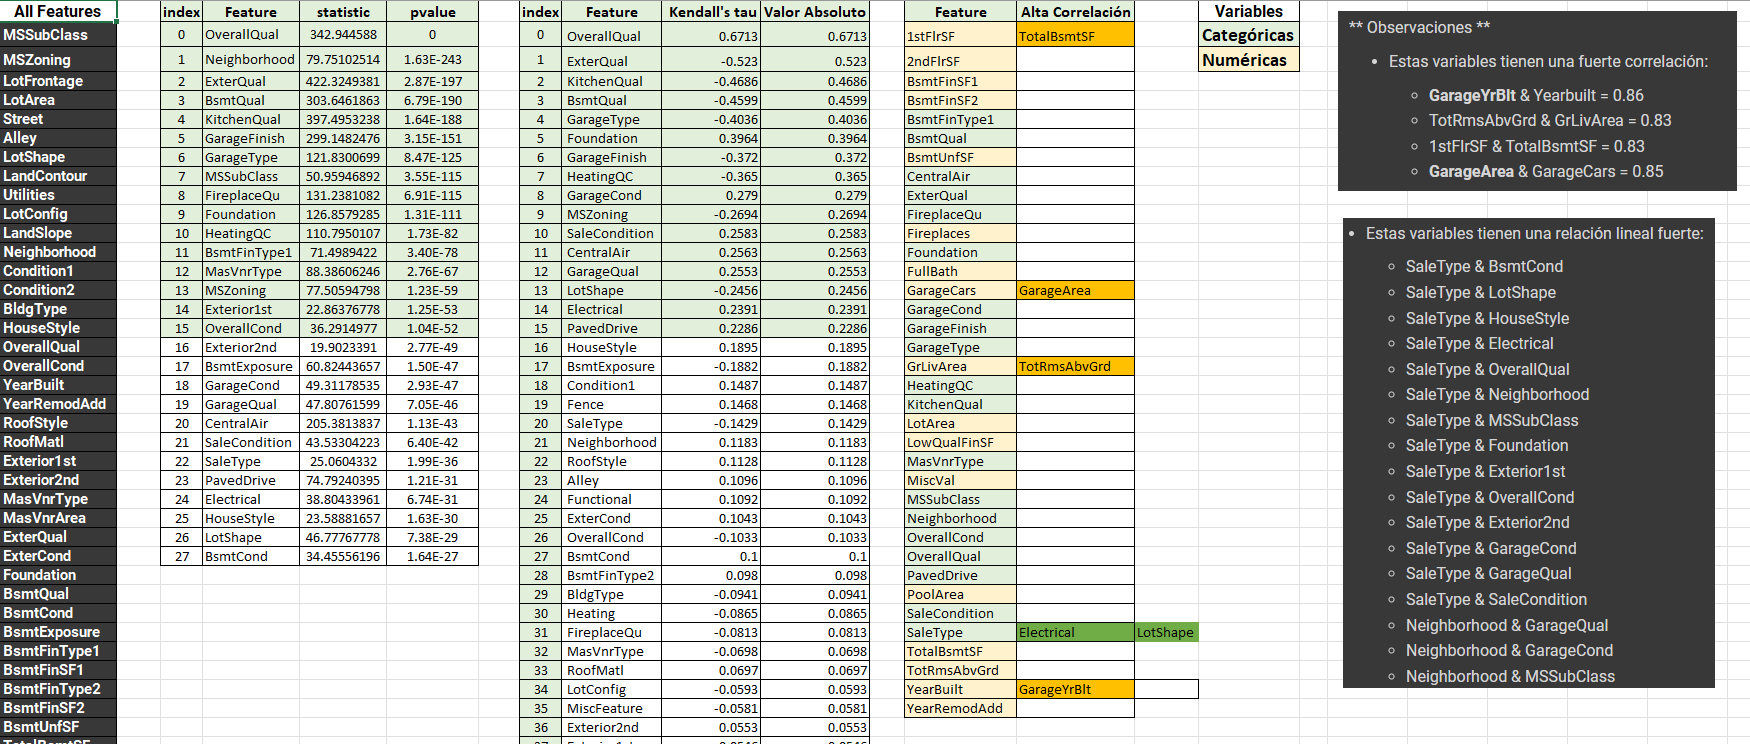





1. 1stFlrSF
2. 2ndFlrSF
3. BsmtFinSF1
4. BsmtFinSF2
5. BsmtFinType1
6. BsmtQual
7. BsmtUnfSF
8. CentralAir
9. ExterQual
10. FireplaceQu
11. Fireplaces
12. Foundation
13. FullBath
14. GarageCars
15. GarageCond
16. GarageFinish
17. GarageType
18. GrLivArea
19. HeatingQC
20. KitchenQual
21. LotArea
22. LowQualFinSF
23. MasVnrType
24. MiscVal
25. MSSubClass
26. Neighborhood
27. OverallCond
28. OverallQual
29. PavedDrive
30. PoolArea
31. SaleCondition
32. SaleType
33. TotalBsmtSF
34. TotRmsAbvGrd
35. YearBuilt
36. YearRemodAdd



In [ ]:
# Los features seleccionados
final_data = data[['1stFlrSF','2ndFlrSF','BsmtFinSF1','BsmtFinSF2','BsmtFinType1'
,'BsmtQual','BsmtUnfSF','CentralAir','ExterQual','FireplaceQu','Fireplaces'
,'Foundation','FullBath','GarageCars','GarageCond','GarageFinish','GarageType'
,'GrLivArea','HeatingQC','KitchenQual','LotArea','LowQualFinSF','MasVnrType'
,'MiscVal','MSSubClass','Neighborhood','OverallCond','OverallQual','PavedDrive'
,'PoolArea','SaleCondition','SaleType','TotalBsmtSF','TotRmsAbvGrd','YearBuilt'
,'YearRemodAdd','SalePrice']]

In [ ]:
# Creamos el dataset "final"
final_data.head()

,1stFlrSF,2ndFlrSF,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtQual,BsmtUnfSF,CentralAir,ExterQual,FireplaceQu,Fireplaces,Foundation,FullBath,GarageCars,GarageCond,GarageFinish,GarageType,GrLivArea,HeatingQC,KitchenQual,LotArea,LowQualFinSF,MasVnrType,MiscVal,MSSubClass,Neighborhood,OverallCond,OverallQual,PavedDrive,PoolArea,SaleCondition,SaleType,TotalBsmtSF,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,856,854,706,0,GLQ,Gd,150,Y,Gd,NA,0,PConc,2,2,TA,RFn,Attchd,1710,Ex,Gd,8450,0,BrkFace,0,60,CollgCr,5,7,Y,0,Normal,WD,856,8,2003,2003,208500
1,1262,0,978,0,ALQ,Gd,284,Y,TA,TA,1,CBlock,2,2,TA,RFn,Attchd,1262,Ex,TA,9600,0,None,0,20,Veenker,8,6,Y,0,Normal,WD,1262,6,1976,1976,181500
2,920,866,486,0,GLQ,Gd,434,Y,Gd,TA,1,PConc,2,2,TA,RFn,Attchd,1786,Ex,Gd,11250,0,BrkFace,0,60,CollgCr,5,7,Y,0,Normal,WD,920,6,2001,2002,223500
3,961,756,216,0,ALQ,TA,540,Y,TA,Gd,1,BrkTil,1,3,TA,Unf,Detchd,1717,Gd,Gd,9550,0,None,0,70,Crawfor,5,7,Y,0,Abnorml,WD,756,7,1915,1970,140000
4,1145,1053,655,0,GLQ,Gd,490,Y,Gd,TA,1,PConc,2,3,TA,RFn,Attchd,2198,Ex,Gd,14260,0,BrkFace,0,60,NoRidge,5,8,Y,0,Normal,WD,1145,9,2000,2000,250000


In [ ]:
# Extramos los features numéricos y categóricos
categ_features = final_data.select_dtypes(include=["object"]).columns
num_features = final_data.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
num_features_df = final_data[num_features]
categ_features_df = final_data[categ_features]

In [ ]:
num_features_df.head()

,1stFlrSF,2ndFlrSF,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,Fireplaces,FullBath,GarageCars,GrLivArea,LotArea,LowQualFinSF,MiscVal,PoolArea,TotalBsmtSF,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,856,854,706,0,150,0,2,2,1710,8450,0,0,0,856,8,2003,2003,208500
1,1262,0,978,0,284,1,2,2,1262,9600,0,0,0,1262,6,1976,1976,181500
2,920,866,486,0,434,1,2,2,1786,11250,0,0,0,920,6,2001,2002,223500
3,961,756,216,0,540,1,1,3,1717,9550,0,0,0,756,7,1915,1970,140000
4,1145,1053,655,0,490,1,2,3,2198,14260,0,0,0,1145,9,2000,2000,250000


In [ ]:
num_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   1stFlrSF      1458 non-null   int64
 1   2ndFlrSF      1458 non-null   int64
 2   BsmtFinSF1    1458 non-null   int64
 3   BsmtFinSF2    1458 non-null   int64
 4   BsmtUnfSF     1458 non-null   int64
 5   Fireplaces    1458 non-null   int64
 6   FullBath      1458 non-null   int64
 7   GarageCars    1458 non-null   int64
 8   GrLivArea     1458 non-null   int64
 9   LotArea       1458 non-null   int64
 10  LowQualFinSF  1458 non-null   int64
 11  MiscVal       1458 non-null   int64
 12  PoolArea      1458 non-null   int64
 13  TotalBsmtSF   1458 non-null   int64
 14  TotRmsAbvGrd  1458 non-null   int64
 15  YearBuilt     1458 non-null   int64
 16  YearRemodAdd  1458 non-null   int64
 17  SalePrice     1458 non-null   int64
dtypes: int64(18)
memory usage: 205.2 KB


In [ ]:
# Escalamos los valores numéricos
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1)) 
scaled_num_feature = pd.DataFrame(scaler.fit_transform(num_features_df), columns=num_features_df.columns)

In [ ]:
scaled_num_feature.head()

,1stFlrSF,2ndFlrSF,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,Fireplaces,FullBath,GarageCars,GrLivArea,LotArea,LowQualFinSF,MiscVal,PoolArea,TotalBsmtSF,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,0.180373,0.413559,0.322669,0.0,0.064212,0.000000,0.666667,0.50,0.332207,0.033420,0.0,0.0,0.0,0.266999,0.500000,0.949275,0.883333,0.241078
1,0.320663,0.000000,0.446984,0.0,0.121575,0.333333,0.666667,0.50,0.224046,0.038795,0.0,0.0,0.0,0.393637,0.333333,0.753623,0.433333,0.203583
2,0.202488,0.419370,0.222121,0.0,0.185788,0.333333,0.666667,0.50,0.350555,0.046507,0.0,0.0,0.0,0.286962,0.333333,0.934783,0.866667,0.261908
3,0.216655,0.366102,0.098720,0.0,0.231164,0.333333,0.333333,0.75,0.333897,0.038561,0.0,0.0,0.0,0.235808,0.416667,0.311594,0.333333,0.145952
4,0.280235,0.509927,0.299360,0.0,0.209760,0.333333,0.666667,0.75,0.450024,0.060576,0.0,0.0,0.0,0.357143,0.583333,0.927536,0.833333,0.298709


In [ ]:
# One-hot encoding de los features categóricos
enc_hot =  pd.get_dummies(final_data[categ_features])
enc_hot.shape

(1458, 138)

In [ ]:
# Contruimos el dataset final con todos los features
final_data = pd.concat([scaled_num_feature, enc_hot], axis=1)
#final_data.drop(categ_features, axis=1, inplace=True)
final_data.shape

(1458, 156)

In [ ]:
final_data.head()

,1stFlrSF,2ndFlrSF,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,Fireplaces,FullBath,GarageCars,GrLivArea,LotArea,LowQualFinSF,MiscVal,PoolArea,TotalBsmtSF,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,CentralAir_N,CentralAir_Y,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,GarageFinish_Fin,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,OverallCond_1,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,OverallQual_1,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,0.180373,0.413559,0.322669,0.0,0.064212,0.000000,0.666667,0.50,0.332207,0.033420,0.0,0.0,0.0,0.266999,0.500000,0.949275,0.883333,0.241078,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,0.320663,0.000000,0.446984,0.0,0.121575,0.333333,0.666667,0.50,0.224046,0.038795,0.0,0.0,0.0,0.393637,0.333333,0.753623,0.433333,0.203583,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0.202488,0.419370,0.222121,0.0,0.185788,0.333333,0.666667,0.50,0.350555,0.046507,0.0,0.0,0.0,0.286962,0.333333,0.934783,0.866667,0.261908,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,0.216655,0.366102,0.098720,0.0,0.231164,0.333333,0.333333,0.75,0.333897,0.038561,0.0,0.0,0.0,0.235808,0.416667,0.311594,0.333333,0.145952,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [ ]:
# Dividimos los grupos de "training" y "testing": 80 % - 20 %
from sklearn.model_selection import train_test_split
# Separamos las variables X, y
X = final_data.drop(['SalePrice'], axis = 1)
y = final_data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=29)

In [ ]:
print ("Los tamaños de los vectores son: ", len(X_train), " y ", len(X_test))

Los tamaños de los vectores son:  1166  y  292


## MODELADO

En este caso utilizaremos los siguientes modelos de regresión.

**Regresión de lazo**: La regresión de lazo es otra variación de la regresión lineal que agrega un término de penalización a la función de costo para evitar el sobreajuste. Este término de penalización se conoce como el término de regularización L1 y obliga al modelo a tener coeficientes dispersos, lo que significa que muchos de los coeficientes serán exactamente iguales a cero.

**Ridge Regression**:  Ridge Regression es una variación de la regresión lineal que agrega un término de penalización a la función de costo para evitar el sobreajuste. Este término de penalización se conoce como término de regularización L2 y obliga al modelo a tener coeficientes pequeños.

In [ ]:
# Importanción de librearías para el modelado
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.linear_model import LassoCV
from sklearn.model_selection import GridSearchCV

In [ ]:
# Realizamos la regresión Lasso con los valores "por defecto"
lasso = Lasso(alpha=0.1)

# Entrenamiento del modelo
lasso.fit(X_train, y_train)

# Realizamos las predicciones con los datos de testeo
y_pred = lasso.predict(X_test)

# Calculamos R-cuadrado y R-cuadrado ajustado
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print('R-cuadrado:', r2)
print('R-cuadrado ajustado:', adj_r2)

R-squared: -0.02790292513853898
Adjusted R-squared: -1.199409935406727


In [ ]:
# Trataremos de encontrar el mejor parámetro alpha para el modelo
reg = LassoCV(cv=5, random_state=0).fit(X_train, y_train)

# Seleccionamos el mejor valor alfa
best_alpha = reg.alpha_

print("Mejor valor de alfa:", best_alpha)

Best alpha value: 8.647002638231749e-05


In [ ]:
# Realizamos nuevamente el entrenamiento con el "mejor" valor de alpha obtenido

lasso = Lasso(alpha=8.647002638231749e-05)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print('R-cuadrado:', r2)
print('R-cuadrado ajustado:', adj_r2)

R-cuadrado: 0.9099864248848755
R-cuadrado ajustado: 0.8073974238345497


In [ ]:
# Realizamos la regresión Ridge con los valores "por defecto"
# Entrenamiento del modelo
reg = Ridge()
reg.fit(X_train, y_train)

# Realizamos las predicciones con los datos de testeo
y_pred = reg.predict(X_test)

# Evaluamos el modelo usando R^2
r2 = reg.score(X_test, y_test)
print('R^2:', r2)

R^2: 0.9062886232793241


In [ ]:
# Tratemos de encontrar los mejores parámtros
# Definir parámetros a probar en el GridSearchCV
param_grid = {'alpha': np.logspace(-3, 3, 7),
              'fit_intercept': [True, False]}

# Instanciamos el modelo Ridge
ridge = Ridge()

# Instanciamos el GridSearchCV
grid = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')

# Entrenamos modelo
grid.fit(X_train, y_train)

# Imprimimos los parámetros óptimos
print("Mejores parámetros: ", grid.best_params_)


Mejores parámetros:  {'alpha': 1.0, 'fit_intercept': False}


In [ ]:
# Realizamos la regresión Ridge con los "mejores" valores obtenidos
# Entrenamiento del modelo
reg = Ridge(alpha=1.0,fit_intercept=False)
reg.fit(X_train, y_train)

# Predicciones con los datos de testeo
y_pred = reg.predict(X_test)

# Evaluamos el modelo con R^2
r2 = reg.score(X_test, y_test)
print('R^2:', r2)

R^2: 0.9062979603119472


In [ ]:
def cv_rmse(model):
    scores_rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfold, n_jobs=4))
    mean_rmse = scores_rmse.mean()
    std_rmse = scores_rmse.std()
    return mean_rmse, std_rmse

### Validación cruzada de los modelos

In [ ]:
# El objetivo de usar la validación cruzada es evaluar la capacidad de 
# generalización de un modelo. Al evaluar el modelo de este modo se puede estimar 
# cómo se comportaría con datos nuevos y se obtiene una estimación más precisa
# del rendimiento del modelo base.

cv_score = []

kfold = KFold(n_splits=10, random_state=3, shuffle=True)

baseline_models = [('Ridge', Ridge()), ('Lasso', Lasso())]

for idx, (name, model) in enumerate(baseline_models):
    if idx < 6:
        pipe = make_pipeline(RobustScaler(), model)
        cv_score.append((name, *cv_rmse(pipe)))
    else: 
        cv_score.append((name, *cv_rmse(model)))   

cv_scores = pd.DataFrame(data=cv_score, columns=['model', 'mean_rmse', 'std_rmse']).sort_values('mean_rmse').set_index('model')
cv_scores

,mean_rmse,std_rmse
model,,
Ridge,0.033193,0.003870
Lasso,0.110047,0.009035


**Observación:**

`mean_rmse` y `std_rmse` representan, respectivamente, el promedio y la desviación estándar del error cuadrático medio (RMSE, por sus siglas en inglés) de un modelo de regresión. El RMSE es una medida de error que se utiliza para evaluar la calidad de ajuste de un modelo. Es una versión normalizada del error cuadrático medio y se obtiene como la raíz cuadrada de la media de los errores cuadrados entre las predicciones del modelo y los valores reales.

En este caso, se están comparando los dos modelos de regresión, el Ridge y el Lasso, y se está mostrando el promedio y la desviación estándar del RMSE para cada modelo.

Podemos ver que **el modelo Ridge tiene un promedio de RMSE de 0.033193 y una desviación estándar de 0.003870**, mientras que **el modelo Lasso tiene un promedio de RMSE de 0.110047 y una desviación estándar de 0.009035**. 

***Esto indica que el modelo Ridge tiene un mejor ajuste a los datos que el modelo Lasso, ya que su RMSE es menor y su desviación estándar es también más pequeña.***

## Conclusión
Un proyecto de regresión de aprendizaje automático es una tarea compleja que requiere una comprensión profunda de los datos, el objetivo y el problema que está tratando de resolver.

* El primer paso en el proyecto fue analizar los datos, que incluían comprender la estructura y las características de los datos, e identificar los valores o tipos de datos faltantes que necesitaban corrección.
* A continuación, se analizó la variable objetivo.
* Se aplicaron correlaciones y un agoritmo de scikit-learn para seleccionar las características más relevantes para la variable de destino.
* Las variables categóricas se codificaron para usarlas en los algoritmos de aprendizaje automático.
* Se aplicaron los algoritmos de aprendizaje automático: Lasso y Ridge.
* Estos algoritmos se modificaron para optimizar su rendimiento, ajustando sus hiperparámetros.
* En este caso el mejor modelo fue Ridge.